In [75]:
# Import libraries
import pandas as pd
import numpy as np
import json
import umap
import matplotlib.pyplot as plt

In [80]:
# read VDjdb dataset
VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")

method = VDJdb['method']

method_dict_component = []
for row in range(0, method.index.stop, 1):
    method_dict_component.append(json.loads(method[row])['frequency'])
    
VDJdb['frequency'] = method_dict_component


In [81]:
# To get the data structure as TCRdist requireabs
# To process the data frame, separate the TRA and TRB. and select all rows of HomoSpaiens
VDJdb_TRA_TRB = VDJdb[['gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.species']]
#VDJdb_full = VDJdb_full[["species", "cdr3.alpha", "v.alpha", "j.alpha", "cdr3.beta", "v.beta", "j.beta"]]


VDJdb_TRA = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRA"]
VDJdb_TRB = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRB"]

VDJdb_TRA_human = VDJdb_TRA[ VDJdb_TRA['species'] == "HomoSapiens"]
VDJdb_TRB_human = VDJdb_TRB[ VDJdb_TRB['species'] == "HomoSapiens"]
VDJdb_TRA_mouse = VDJdb_TRA[ VDJdb_TRA['species'] == "MusMusculus"]
VDJdb_TRB_mouse = VDJdb_TRB[ VDJdb_TRB['species'] == "MusMusculus"]
#VDJdb_TRA_TRB_human = VDJdb_full[ VDJdb_full['species'] == "HomoSapiens"]
#VDJdb_TRA_TRB_mouse = VDJdb_full[ VDJdb_full['species'] == "MusMusculus"]


VDJdb_TRA_human_GIANA =  VDJdb_TRA_human[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope', 'antigen.species']]
#VDJdb_TRA_human_GIANA['count..templates.reads.'] = 1
VDJdb_TRA_human_GIANA = VDJdb_TRA_human_GIANA[0:9000]
display(VDJdb_TRA_human_GIANA)
VDJdb_TRA_human_GIANA.to_csv('VDJdb_TRA_human_GIANA.txt', sep='\t', index=False)

,cdr3,v.segm,j.segm,antigen.epitope,antigen.species
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEKGGL,HIV-1
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,FLKEKGGL,HIV-1
5,CAVKASGSRLT,TRAV2*01,NaN,FLKEKGGL,HIV-1
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,FLKEKGGL,HIV-1
9,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEQGGL,HIV-1
...,...,...,...,...,...
28229,CAVSDPPSGNTPLVF,TRAV8-4*01,TRAJ29*01,IVTDFSVIK,EBV
28231,CAARGKGSLGGNTPLVF,TRAV29/DV5*01,TRAJ29*01,KLGGALQAK,CMV
28233,CAGPYNQGGKLIF,TRAV12-2*01,TRAJ23*01,GILGFVFTL,InfluenzaA
28235,CAVAVGVSGGGADGLTF,TRAV12-2*01,TRAJ45*01,GILGFVFTL,InfluenzaA


In [63]:
Encoding_Matrix = pd.read_csv('VDJdb_TRA_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
display(Encoding_Matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,CAAAETSYDKVIF,TRAV13-1*01,TRAJ50*01,RAKFKQLL,0.408501,-0.463889,-0.397330,-0.019729,0.511896,0.101767,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
1,CAAAGDNNRKLIW,TRAV13-1*01,TRAJ38*01,NLVPMVATV,0.185993,-0.440178,-0.447695,0.343410,0.446036,0.409746,...,-0.335624,0.170363,0.423411,0.466816,-0.503472,-0.379369,0.149482,0.321768,0.285847,0.684699
2,CAAAMDSSYKLIF,TRAV12-2*01,TRAJ12*01,GADGVGKSAL,0.185993,-0.440178,-0.447695,0.343410,0.446036,0.409746,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
3,CAACAEYGNKLVF,TRAV27*01,TRAJ47*01,LLWNGPMAV,0.411340,0.135124,0.624923,-0.101203,-0.030935,0.237519,...,0.107914,0.130335,0.342940,-0.703101,-0.132454,0.486611,0.084516,-0.699910,0.040827,-0.472049
4,CAACQGGSEKLVF,TRAV41*01,TRAJ57*01,NLVPMVATV,-0.330413,-0.438601,-0.550938,-0.043808,-0.351609,0.251349,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,CAVSVSREGAGGTSYGKLTF,TRAV8-4*01,TRAJ52*01,GILGFVFTL,0.705221,-0.173836,-0.215567,-0.070762,0.165031,0.682009,...,-0.521770,0.135226,0.506533,0.812163,0.020519,0.274643,-0.454736,1.300310,-0.574264,0.810505
7421,CAYRSTAGSFGQGGSEKLVF,TRAV38-2/DV8*01,TRAJ57*01,GILGFVFTL,-0.642721,-0.974322,-0.570437,-0.165921,-1.061089,-0.170762,...,1.068186,1.097017,1.189806,0.653387,-0.907105,-1.126341,-1.108326,0.362357,-1.432017,-0.179796
7422,CILRASSDYAGGTSYGKLTF,TRAV26-2*01,TRAJ52*01,GILGFVFTL,0.276555,-0.586516,-0.217038,0.145827,0.907837,-0.479340,...,-0.438842,-0.006589,0.312674,0.015176,0.262202,-0.242580,-0.553757,1.167701,-0.357009,1.139414
7423,CAAIPVRNGRMNYGGSQGNLIF,TRAV29/DV5*01,TRAJ42*01,GILGFVFTL,-0.660825,-0.877201,-1.101875,-0.087617,-0.703219,0.502697,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


In [86]:
Distance_matrix_by_GIANA = pd.read_csv('Distance_matrix_by_GIANA.csv')
Distance_matrix_by_GIANA_array = Distance_matrix_by_GIANA.iloc[:, 1:].to_numpy()

Processed_dataset_by_GIANA = pd.read_csv('Processed_dataset_by_GIANA.csv')
display(Processed_dataset_by_GIANA)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V6.1,V7,V8,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
0,CAASEGAPDKLIF,CAASEGAPDKLIF,1,TRAV13-1*01,TRAJ34*01,RAKFKQLL,EBV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
1,CAASEGAPDKLIF.1,CAASEGAPDKLIF,1,TRAV13-1*01,TRAJ34*01,IVTDFSVIK,EBV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
2,CAASFAGNTPLVF,CAASFAGNTPLVF,2,TRAV29/DV5*01,TRAJ29*01,NLVPMVATV,CMV,-0.312309,-0.535722,-0.019499,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
3,CAASFAGNTPLVF.1,CAASFAGNTPLVF,2,TRAV29/DV5*01,TRAJ29*01,NLVPMVATV,CMV,-0.312309,-0.535722,-0.019499,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
4,CAASIGAGNMLTF,CAASIGAGNMLTF,3,TRAV29/DV5*01,TRAJ39*01,NLVPMVATV,CMV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,YFLSSGARVTGGGNKITF,YFLSSGARVTGGGNKITF,824,TRAV9-2*01,TRAJ10*01,RLGPVQNEV,HCV,-0.462359,-0.561227,-0.370646,...,1.068186,1.097017,1.189806,0.653387,-0.907105,-1.126341,-1.108326,0.362357,-1.432017,-0.179796
2953,CALSLAARLTGGGNKLTF,CALSLAARLTGGGNKLTF,825,TRAV9-2*01,TRAJ10*01,RLGPVQNEV,HCV,-0.491752,-0.217473,-1.082559,...,0.561932,0.574888,0.177300,0.544792,0.081775,-0.514840,-0.475386,0.685828,-0.985729,-0.614067
2954,CALSLAARLTGGGNKLTF.1,CALSLAARLTGGGNKLTF,825,TRAV9-2*01,TRAJ10*01,RLGPVQNEV,HCV,-0.491752,-0.217473,-1.082559,...,0.561932,0.574888,0.177300,0.544792,0.081775,-0.514840,-0.475386,0.685828,-0.985729,-0.614067
2955,CAAIPVRNGRMNYGGSQGNLIF,CAAIPVRNGRMNYGGSQGNLIF,826,TRAV29/DV5*01,TRAJ42*01,GILGFVFTL,InfluenzaA,-0.660825,-0.877201,-1.101875,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


[4 4 0 ... 5 5 5]


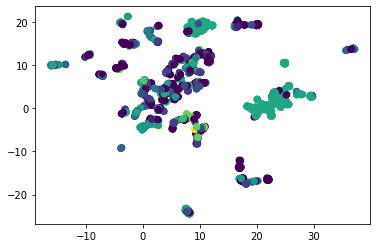

In [108]:
umap_TRA = umap.UMAP(random_state=42, n_components=2, min_dist=0.5, n_neighbors = 25)

VDJ_test = Processed_dataset_by_GIANA[0:2000]
TRA_epitope_label = VDJ_test['V6']
TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
print(TRA_epitope_label)

TRA_umap_fit = umap_TRA.fit_transform(Distance_matrix_by_GIANA_array[0:2000])
#print(TRA_umap_fit)
#fig = plt.figure()
#sub = fig.add_subplot(111)
#sub.scatter(TRA_umap_fit[0], TRA_umap_fit[1], c = TRA_epitope_lable)
plt.scatter(TRA_umap_fit[:,0], TRA_umap_fit[:,1], c=TRA_epitope_label)